# DME DETECTION

In [1]:
import os
import numpy as np
import cv2 # OpenCV
from sklearn.svm import SVC # SVM klasifikator
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier # KNN
import matplotlib.pyplot as plt
import skimage as sk
from skimage import transform
from skimage import util
from skimage import io
import random
from scipy import ndarray
%matplotlib inline

In [2]:
def load_image(path):
    return cv2.imread(path)

def display_image(image):
    plt.imshow(image, 'gray')
    
def image_gray(image):
    return cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)

def image_bin(image_gs):
    height, width = image_gs.shape[0:2]
    image_binary = np.ndarray((height, width), dtype=np.uint8)
    ret,image_bin = cv2.threshold(image_gs, 127, 255, cv2.THRESH_BINARY)
    return image_bin

def invert(image):
    return 255-image

def resize_image(image):
    resized_image = sk.transform.resize(image, (100, 100))
    rescaled_image = 255 * resized_image
    final_image = rescaled_image.astype(np.uint8)
    return final_image

def random_rotation(img):
    random_degree = random.uniform(10, 180)
    return sk.transform.rotate(img, random_degree)

def increase_brightness(img):
    hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
    h, s, v = cv2.split(hsv)
    
    value = random.randint(0, 100)
    lim = 255 - value
    v[v > lim] = 255
    v[v <= lim] += value

    final_hsv = cv2.merge((h, s, v))
    img = cv2.cvtColor(final_hsv, cv2.COLOR_HSV2BGR)
    return img

def reshape_data(input_data):
    nsamples, nx, ny = input_data.shape
    return input_data.reshape((nsamples, nx*ny))

# Učitavanje trening skupa slika

In [4]:
train_dir_dme = 'images/TRAIN/DME'
train_dir_normal = 'images/TRAIN/NORMAL'

nor_imgs = []
dme_imgs = []

folder_path = 'images/edited'

for img_name in os.listdir(train_dir_normal):
    img_path = os.path.join(train_dir_normal, img_name)
    if 'NORMAL' in img_name:
        img = load_image(img_path)
        if img.shape[1] != 512:
            img=img[:,128:640]
        img2 = (image_bin(image_gray(img)))
        proba, contours, hierarchy = cv2.findContours(img2.copy(), cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)
        c = max(contours, key = cv2.contourArea)
        x, y, w, h = cv2.boundingRect(c)
        visina = y + h/2
        if (visina > 0 and visina < 60) or (visina > 400 and visina < 496) :
            #cv2.drawContours(proba,[c],0,(255,0,0),7)
            cv2.fillPoly(img, pts =[c], color=(0,0,0))
        nor_imgs.append(img)
        new_file_path = '%s/%s.jpeg' %(folder_path, img_name[:-5])
        img = resize_image(img)
        io.imsave(new_file_path, img)
    
for img_name in os.listdir(train_dir_dme):
    img_path = os.path.join(train_dir_dme, img_name)
    if 'DME' in img_name:
        img = load_image(img_path)
        if img.shape[1] != 512:
            img=img[:,128:640]
        img2 = (image_bin(image_gray(img)))
        proba2, contours, hierarchy = cv2.findContours(img2.copy(), cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)
        c = max(contours, key = cv2.contourArea)
        x, y, w, h = cv2.boundingRect(c)
        visina = y + h/2
        if (visina > 0 and visina < 100) or (visina > 350 and visina < 496) :
            #cv2.drawContours(proba,[c],0,(255,0,0),7)
            cv2.fillPoly(img, pts =[c], color=(0,0,0))
        dme_imgs.append(img)
        new_file_path = '%s/%s.jpeg' %(folder_path, img_name[:-5])
        img = resize_image(img)
        io.imsave(new_file_path, img)
   
        
print("Normal images #: ", len(nor_imgs))
print("DME images #: ", len(dme_imgs))

C:\Users\Makaric\Anaconda3\lib\site-packages\skimage\transform\_warps.py:84: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "


Normal images #:  242
DME images #:  242


# Učitavanje test skupa slika

In [10]:
test_dir_dme = 'images/TEST/DME'
test_dir_normal = 'images/TEST/NORMAL'

nor_imgs_test = []
dme_imgs_test = []

folder_path_test = 'images/edited_test'

for img_name in os.listdir(test_dir_normal):
    img_path = os.path.join(test_dir_normal, img_name)
    if 'NORMAL' in img_name:
        img = load_image(img_path)
        if img.shape[1] != 512:
            img=img[:,128:640]
        img2 = (image_bin(image_gray(img)))
        proba, contours, hierarchy = cv2.findContours(img2.copy(), cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)
        c = max(contours, key = cv2.contourArea)
        x, y, w, h = cv2.boundingRect(c)
        visina = y + h/2
        if (visina > 0 and visina < 60) or (visina > 400 and visina < 496) :
            #cv2.drawContours(proba,[c],0,(255,0,0),7)
            cv2.fillPoly(img, pts =[c], color=(0,0,0))
        new_file_path = '%s/%s.jpeg' %(folder_path_test, img_name[:-5])
        img = resize_image(img)
        nor_imgs_test.append(img)
        io.imsave(new_file_path, img)
    
for img_name in os.listdir(test_dir_dme):
    img_path = os.path.join(test_dir_dme, img_name)
    if 'DME' in img_name:
        img = load_image(img_path)
        if img.shape[1] != 512:
            img=img[:,128:640]
        img2 = (image_bin(image_gray(img)))
        proba2, contours, hierarchy = cv2.findContours(img2.copy(), cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)
        c = max(contours, key = cv2.contourArea)
        x, y, w, h = cv2.boundingRect(c)
        visina = y + h/2
        if (visina > 0 and visina < 100) or (visina > 350 and visina < 496) :
            #cv2.drawContours(proba,[c],0,(255,0,0),7)
            cv2.fillPoly(img, pts =[c], color=(0,0,0))
        new_file_path = '%s/%s.jpeg' %(folder_path_test, img_name[:-5])
        img = resize_image(img)
        dme_imgs_test.append(img)
        io.imsave(new_file_path, img)
   
        
print("Normal test images #: ", len(nor_imgs_test))
print("DME test images #: ", len(dme_imgs_test))

C:\Users\Makaric\Anaconda3\lib\site-packages\skimage\transform\_warps.py:84: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "


Normal test images #:  8
DME test images #:  8


# Augmentacija slika

In [6]:
edited_dir = 'images/edited'
augmented_dir = 'images/augmented'

augmented_imgs_nor = []
augmented_imgs_dme = []

num_normal = 0
num_dme = 0

for img_name in os.listdir(edited_dir):
    img_path = os.path.join(edited_dir, img_name)
    img = load_image(img_path)
    
    if 'DME' in img_name:
        num_dme += 1
        augmented_imgs_dme.append(img)
        new_file_path = '%s/DME_%s.jpeg' %(augmented_dir, num_dme)
        io.imsave(new_file_path, img)
    
        num_dme += 1
        rot_image = random_rotation(img)
        new_file_path = '%s/DME_%s.jpeg' %(augmented_dir, num_dme)
        io.imsave(new_file_path, rot_image)
        rot_image = rot_image.astype(np.uint8)
        augmented_imgs_dme.append(rot_image)
        
        num_dme += 1
        bri_image = increase_brightness(img)
        augmented_imgs_dme.append(bri_image)
        new_file_path = '%s/DME_%s.jpeg' %(augmented_dir, num_dme)
        io.imsave(new_file_path, bri_image)
        
        num_dme += 1
        bri_image = increase_brightness(img)
        bri_rot_image = random_rotation(bri_image)
        new_file_path = '%s/DME_%s.jpeg' %(augmented_dir, num_dme)
        io.imsave(new_file_path, bri_rot_image)
        bri_rot_image = bri_rot_image.astype(np.uint8)
        augmented_imgs_dme.append(bri_rot_image)
        
    else :
        num_normal += 1
        augmented_imgs_nor.append(img)
        new_file_path = '%s/NORMAL_%s.jpeg' %(augmented_dir, num_normal)
        io.imsave(new_file_path, img)
    
        num_normal += 1
        rot_image = random_rotation(img)
        new_file_path = '%s/NORMAL_%s.jpeg' %(augmented_dir, num_normal)
        io.imsave(new_file_path, rot_image)
        rot_image = rot_image.astype(np.uint8)
        augmented_imgs_nor.append(rot_image)
        
        num_normal += 1
        bri_image = increase_brightness(img)
        augmented_imgs_nor.append(bri_image)
        new_file_path = '%s/NORMAL_%s.jpeg' %(augmented_dir, num_normal)
        io.imsave(new_file_path, bri_image)
        
        num_normal += 1
        bri_image = increase_brightness(img)
        bri_rot_image = random_rotation(bri_image)
        new_file_path = '%s/NORMAL_%s.jpeg' %(augmented_dir, num_normal)
        io.imsave(new_file_path, bri_rot_image)
        bri_rot_image = bri_rot_image.astype(np.uint8)
        augmented_imgs_nor.append(bri_rot_image)
        
print("Augmented images normal #: ", len(augmented_imgs_nor))
print("Augmented images dme #: ", len(augmented_imgs_dme))

C:\Users\Makaric\Anaconda3\lib\site-packages\skimage\util\dtype.py:122: UserWarning: Possible precision loss when converting from float64 to uint8
  .format(dtypeobj_in, dtypeobj_out))


Augmented images normal #:  968
Augmented images dme #:  968


# HOG deskriptor

In [7]:
nbins = 9 # broj binova
cell_size = (8, 8) # broj piksela po celiji
block_size = (3, 3) # broj celija po bloku

hog = cv2.HOGDescriptor(_winSize=(img.shape[1] // cell_size[1] * cell_size[1], 
                                  img.shape[0] // cell_size[0] * cell_size[0]),
                        _blockSize=(block_size[1] * cell_size[1],
                                    block_size[0] * cell_size[0]),
                        _blockStride=(cell_size[1], cell_size[0]),
                        _cellSize=(cell_size[1], cell_size[0]),
                        _nbins=nbins)

# Trening skup

In [8]:
pos_features = []
neg_features = []
labels = []

for img in augmented_imgs_nor:
    pos_features.append(hog.compute(img))
    labels.append(1)

for img in augmented_imgs_dme:
    neg_features.append(hog.compute(img))
    labels.append(0)

pos_features = np.array(pos_features)
neg_features = np.array(neg_features)
x_train = np.vstack((pos_features, neg_features))
y_train = np.array(labels)

x_train = reshape_data(x_train)
print('Train shape: ', x_train.shape, y_train.shape)

Train shape:  (1936, 8100) (1936,)


# Test skup

In [11]:
pos_features_test = []
neg_features_test = []
labels_test = []

for img in nor_imgs_test:
    pos_features_test.append(hog.compute(img))
    labels_test.append(1)

for img in dme_imgs_test:
    neg_features_test.append(hog.compute(img))
    labels_test.append(0)

pos_features_test = np.array(pos_features_test)
neg_features_test = np.array(neg_features_test)
x_test = np.vstack((pos_features_test, neg_features_test))
y_test = np.array(labels_test)

x_test = reshape_data(x_test)
print('Test shape: ', x_test.shape, y_test.shape)

Test shape:  (16, 8100) (16,)


# Obučavanje i validacija SVM klasifikatora

In [12]:
clf_svm = SVC(kernel='linear', probability=True) 
clf_svm.fit(x_train, y_train)
y_train_pred = clf_svm.predict(x_train)
y_test_pred = clf_svm.predict(x_test)
print("Train accuracy: ", accuracy_score(y_train, y_train_pred))
print("Validation accuracy: ", accuracy_score(y_test, y_test_pred))

Train accuracy:  0.8662190082644629
Validation accuracy:  0.875


# Obučavanje i validacija KNN klasifikatora

In [13]:
clf_knn = KNeighborsClassifier(n_neighbors=10)
clf_knn = clf_knn.fit(x_train, y_train)
y_train_pred = clf_knn.predict(x_train)
y_test_pred = clf_knn.predict(x_test)
print("Train accuracy: ", accuracy_score(y_train, y_train_pred))
print("Validation accuracy: ", accuracy_score(y_test, y_test_pred))

Train accuracy:  0.75
Validation accuracy:  0.8125


# isprobavanje

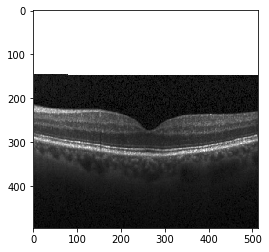

In [8]:
proba = load_image('images/TRAIN/NORMAL/NORMAL-351109-1.jpeg')
#hog.compute(img)
#display_image(proba)
proba = proba.astype(np.uint8)
display_image(proba)

#resized = resize_image(proba)
#display_image(resized)

#rotated = random_rotation(proba)
#rotated = rotated.astype(np.uint8)
#hog.compute(rotated)
#display_image(rotated)

#brightness = increase_brightness(proba)
#hog.compute(brightness)
#display_image(brightness)

0 0 512 496
248.0


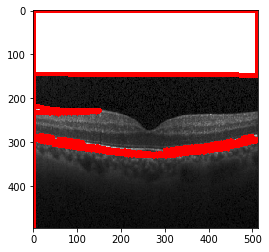

In [42]:
proba = load_image('images/TRAIN/NORMAL/NORMAL-351109-1.jpeg')
#display_image(proba)
#print(proba.shape[1])
#print(proba[0:40, :])
if proba.shape[1] != 512:
    proba = proba[:,128:640]

img = (image_bin(image_gray(proba)))
proba2, contours, hierarchy = cv2.findContours(img.copy(), cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)
c = max(contours, key = cv2.contourArea)

x,y,w,h = cv2.boundingRect(c) #koordinate i velicina granicnog pravougaonika
print(x, y, w, h)
visina = y + h/2
print(visina)
#if (visina > 0 and visina < 60) or (visina > 400 and visina < 496) :
#cv2.fillPoly(proba, pts =[c], color=(0,0,0))
cv2.drawContours(proba,[c],0,(255,0,0),10)
display_image(proba)
#new_file_path = 'images/TRAIN/DME/DME-5912153-1.jpeg'
#io.imsave(new_file_path, proba)